In [1]:
bird_counts <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-06-18/bird_counts.csv")

Parsed with column specification:
cols(
  year = col_double(),
  species = col_character(),
  species_latin = col_character(),
  how_many_counted = col_double(),
  total_hours = col_double(),
  how_many_counted_by_hour = col_double()
)


In [2]:
library(tidyverse)
library(treemap)
library(ggthemes)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


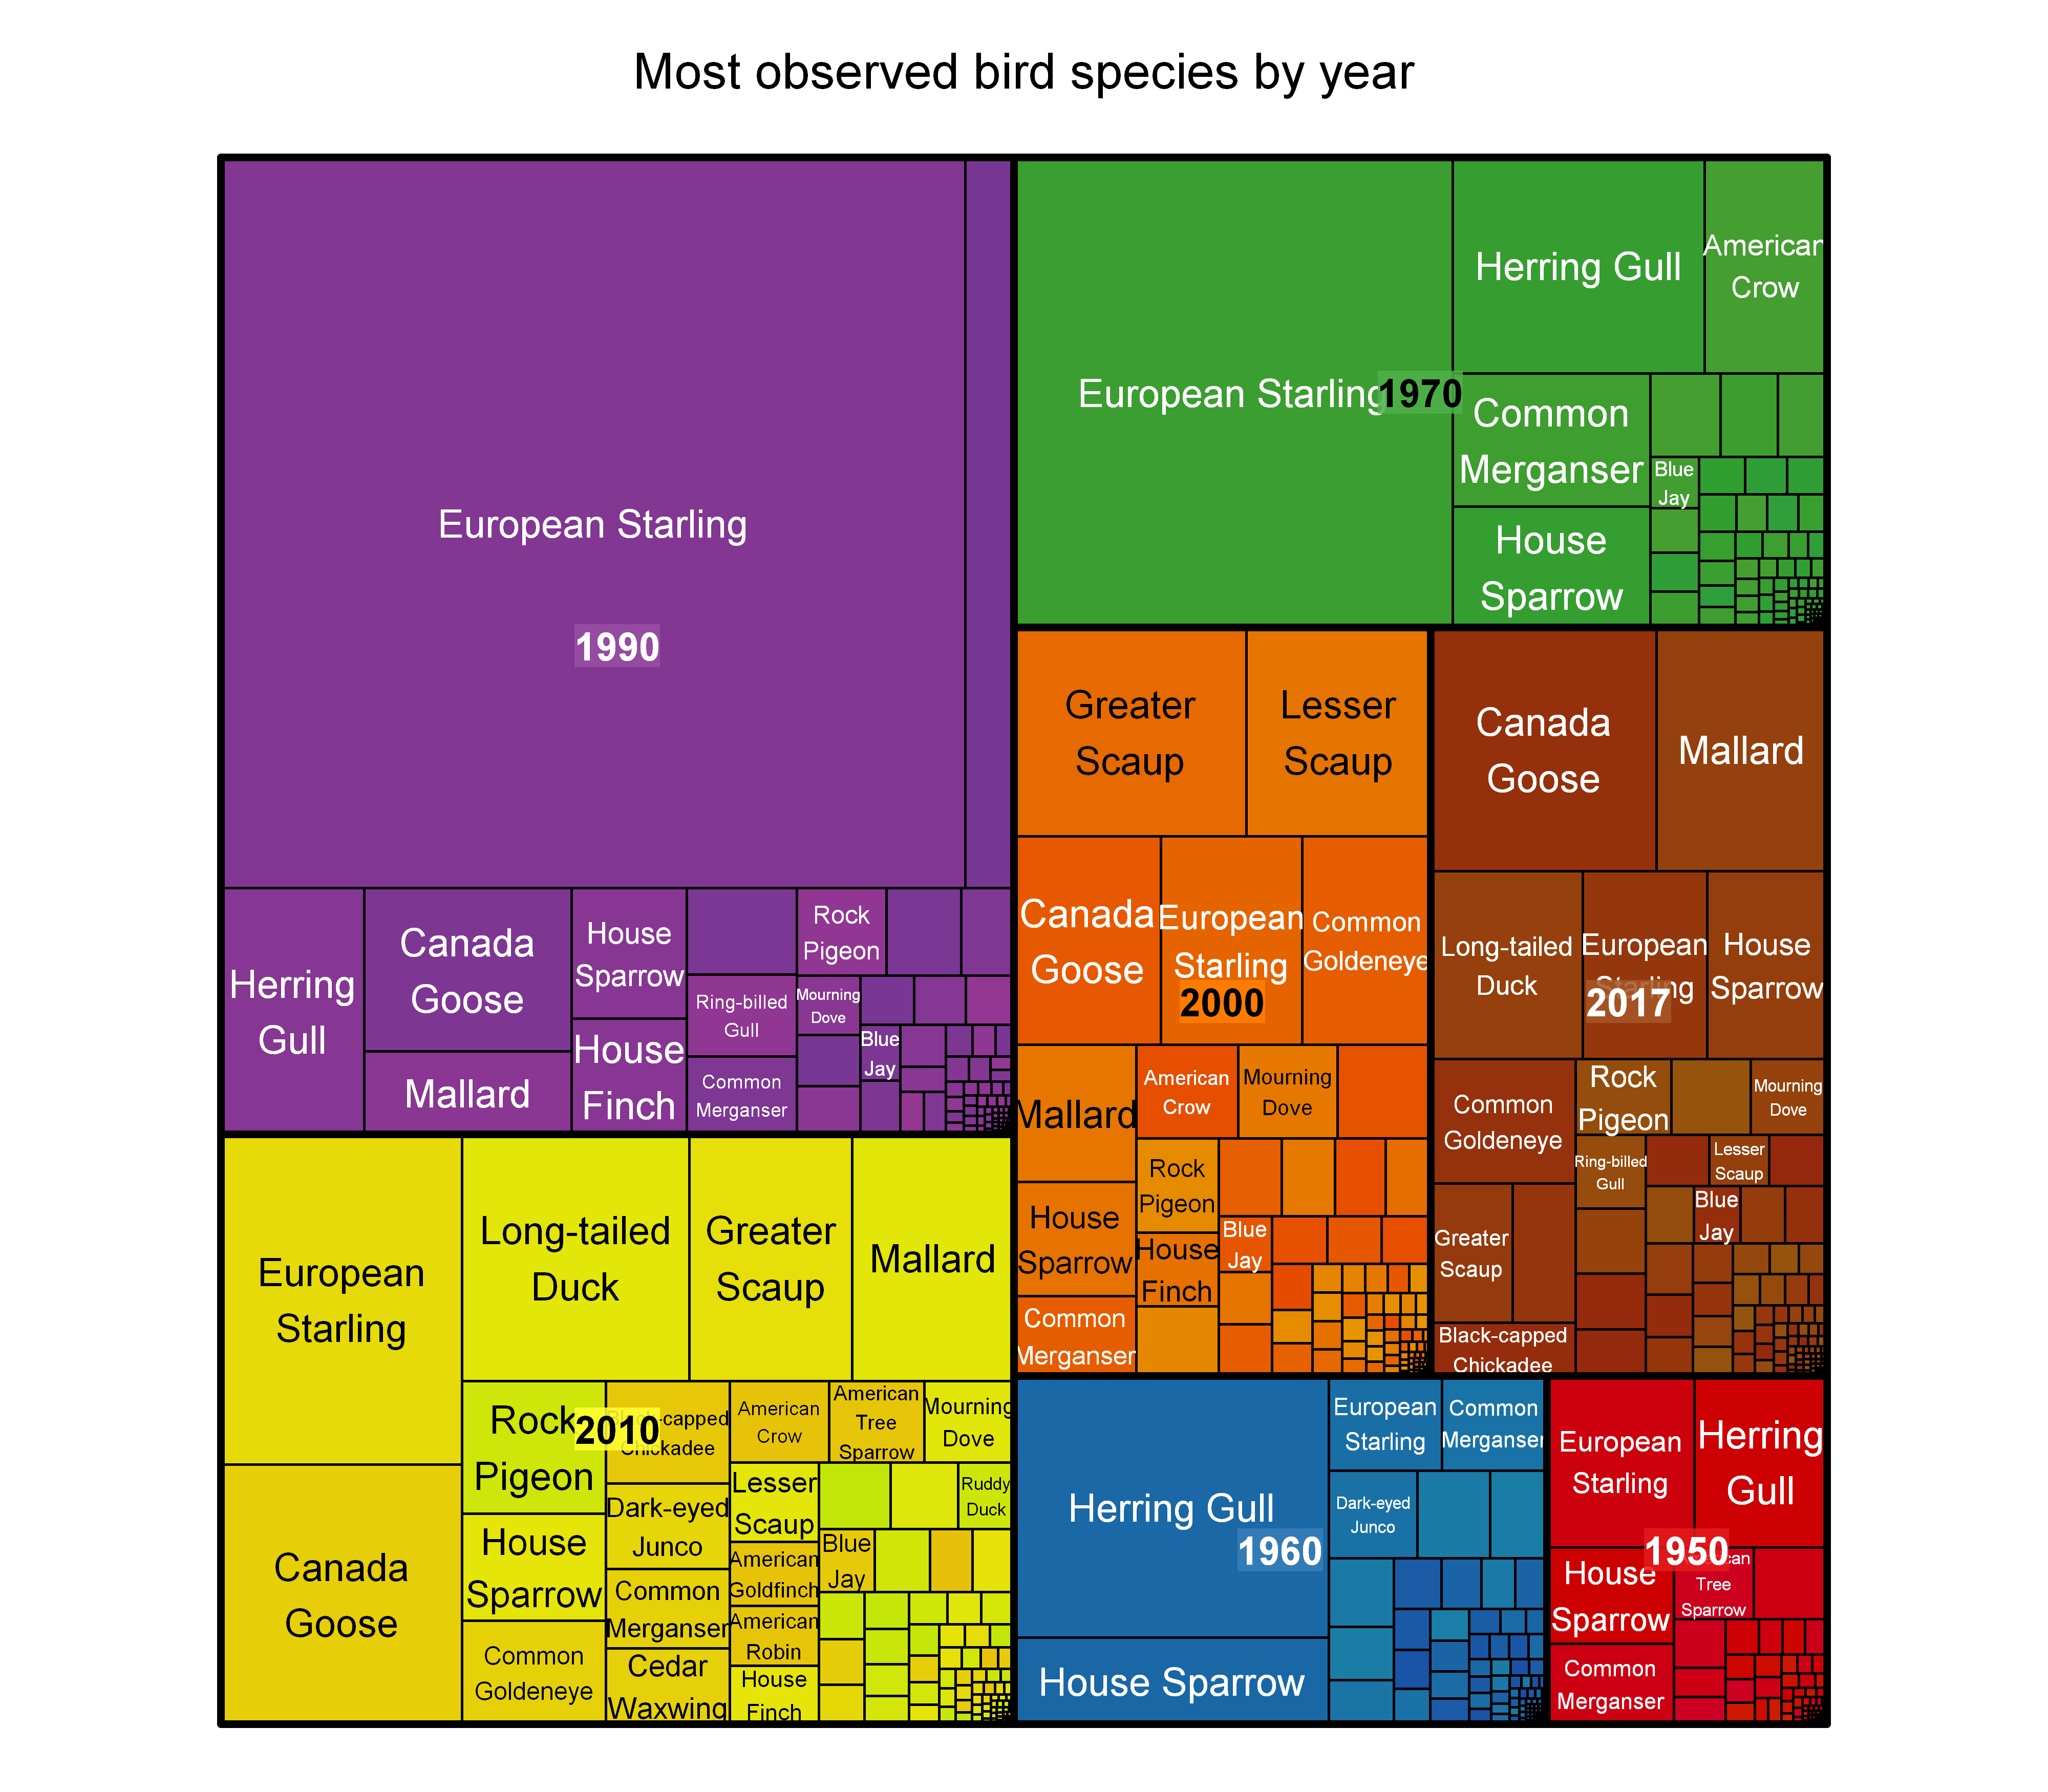

In [6]:
options(repr.plot.width = 8, repr.plot.height = 7, repr.plot.res = 500)
bird_counts %>% group_by(species, year) %>%
summarize(total_count = sum(how_many_counted), total_hours = sum(total_hours)) %>%
na.omit %>% filter(total_count>0, year %in% c(1930,1950,1960,1970,1990,2000,2010,2017)) %>%
treemap(index = c("year", "species"), 
        vSize = "total_count",
        palette = "Set1",
        title="Most observed bird species by year",
        fontsize.title = 14)

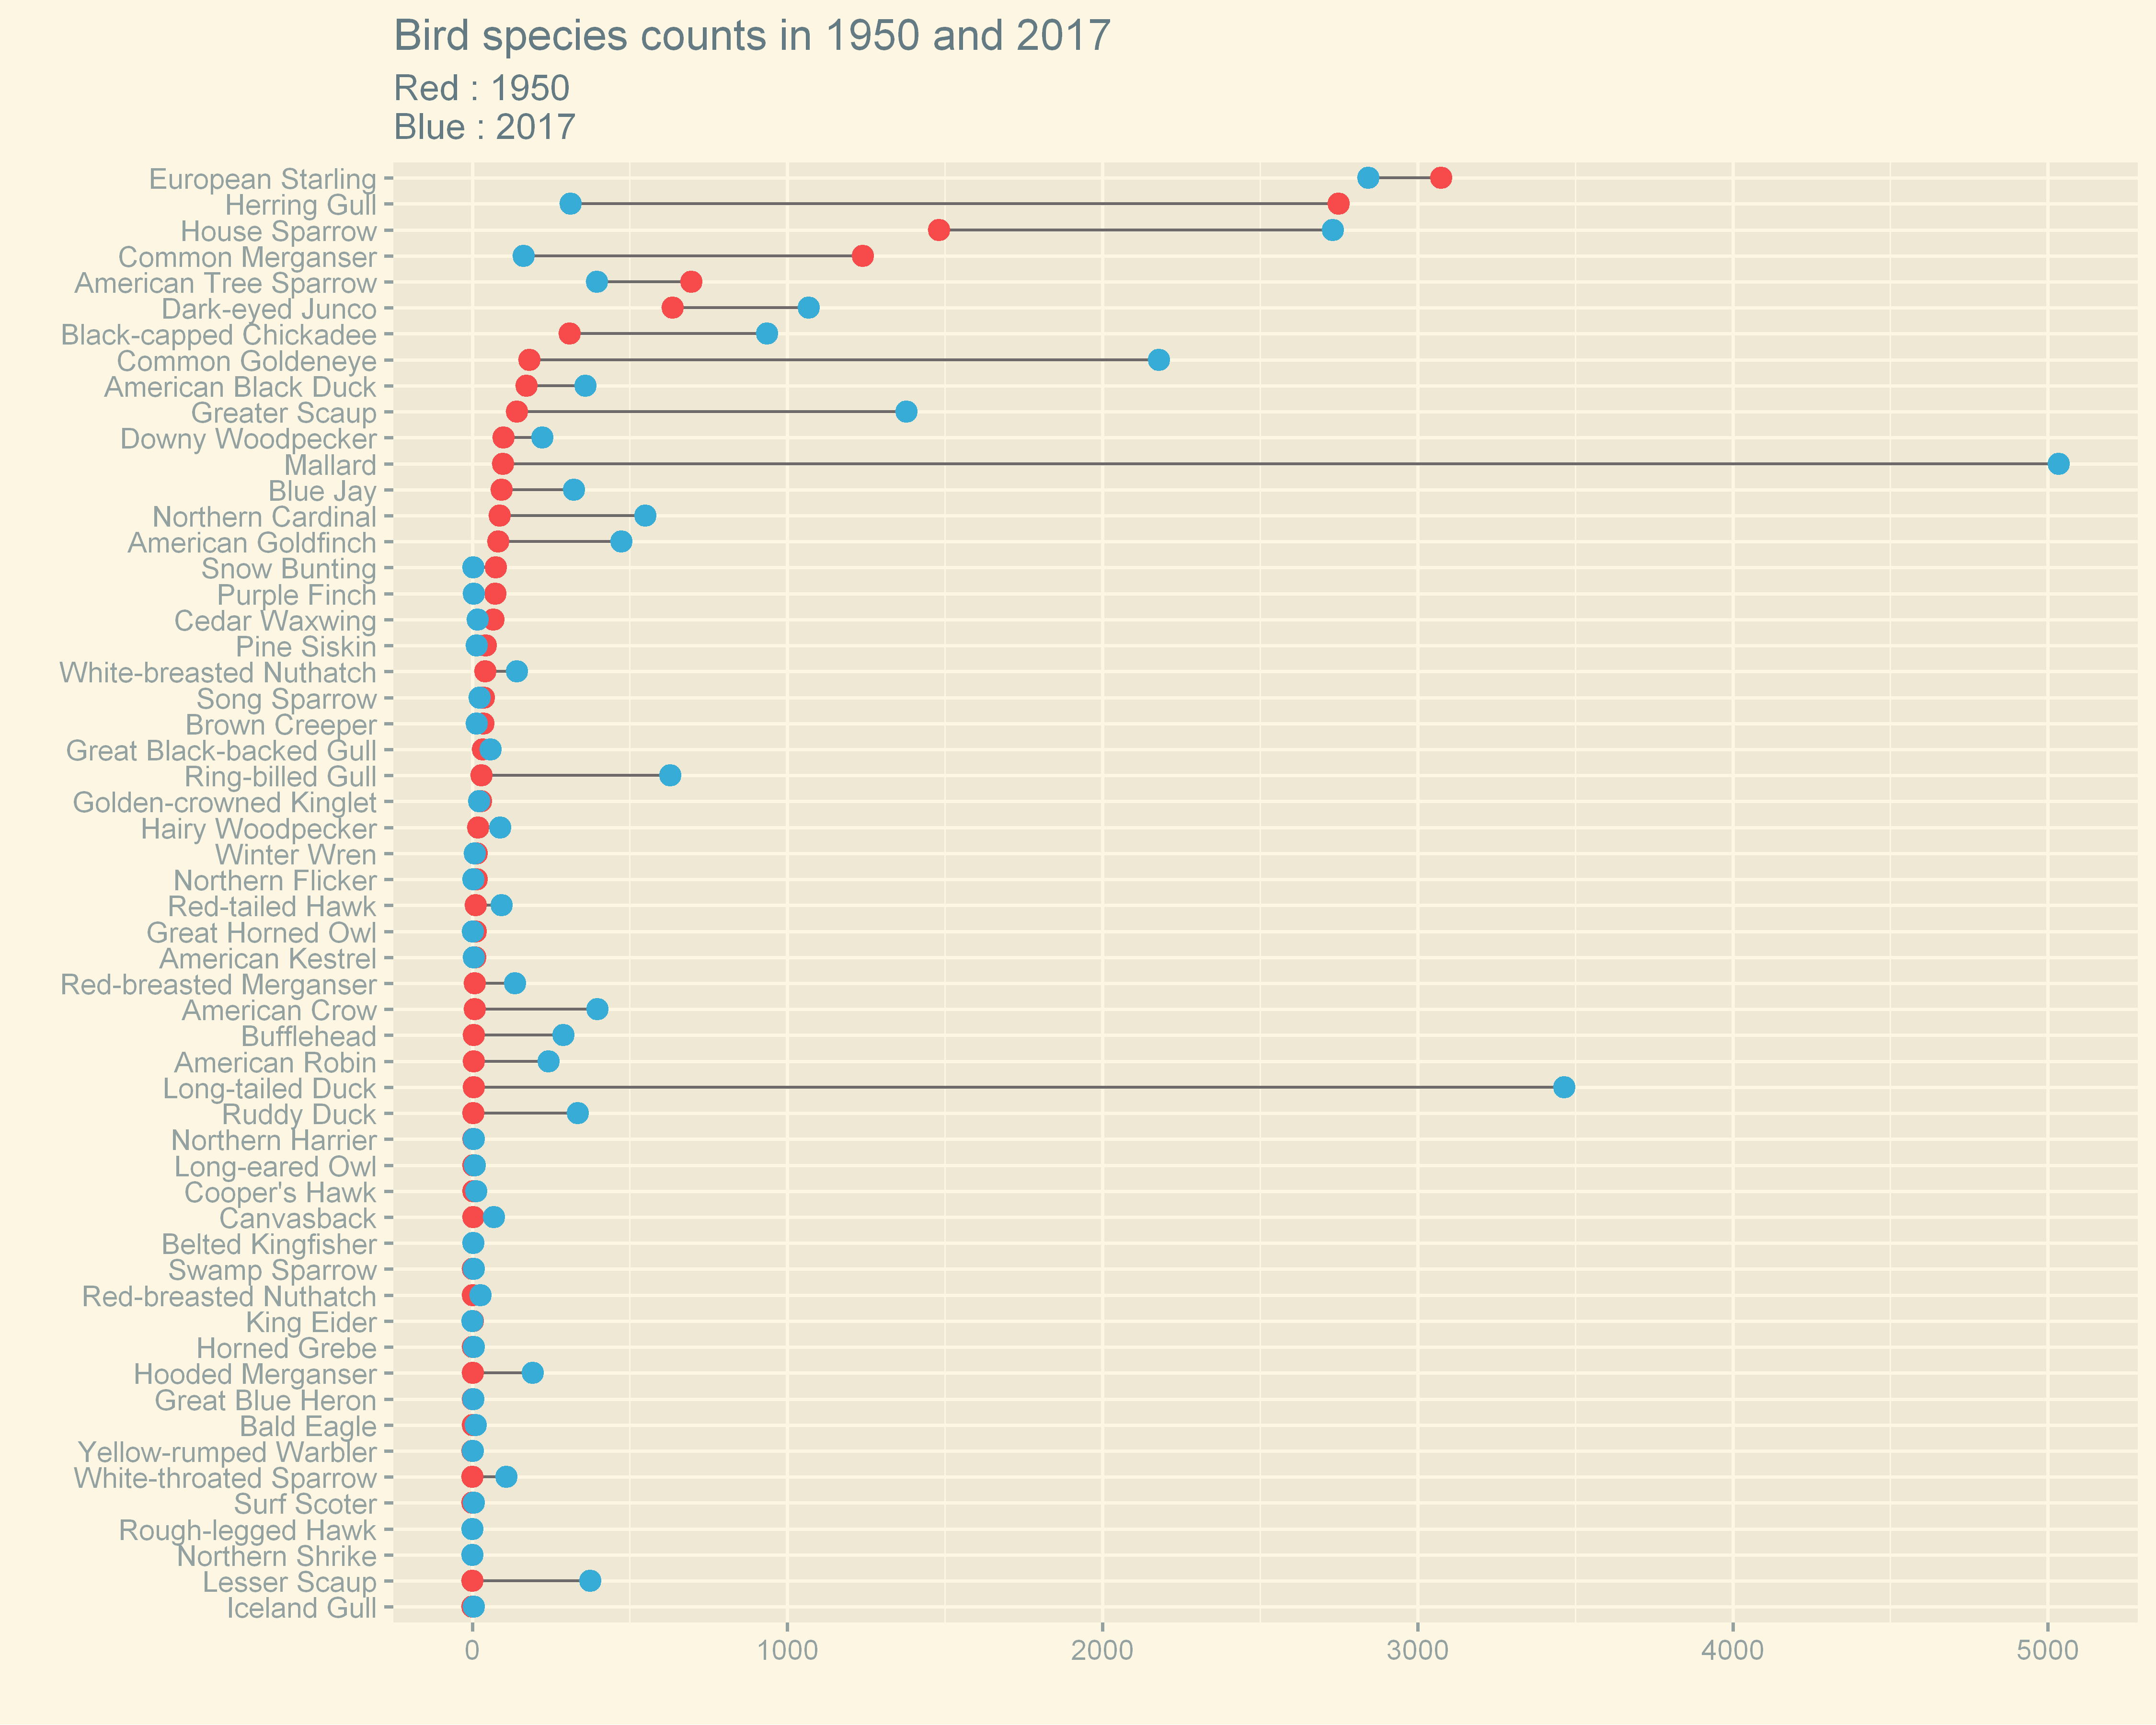

In [4]:
bird_counts %>%
group_by(year, species) %>%
summarize(total_count = sum(how_many_counted)) %>%
filter(total_count >0) %>%
spread(year, total_count) %>%
select(species, `1950`, `2017`) %>% na.omit %>%
ggplot() + geom_segment( aes(x=reorder(species, `1950`), xend=species, y=`1950`, yend=`2017`), color="#6E6A6A") +
geom_point( aes(species, y=`1950`), color="#F74B4B", size=3 ) +
  geom_point( aes(x=species, y=`2017`),color="#36ACD7", size=3 ) +
  coord_flip() + theme_solarized_2() +
labs(title = "Bird species counts in 1950 and 2017", x ="", y = "", subtitle = "Red : 1950 \nBlue : 2017")